<a href="https://colab.research.google.com/github/Desh86/Prediction-of-Product-Sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction-of-Product-Sales
- Author: Deshan Pillay



## Project Overview

* Predict the sales for food items which are sold at various stores.
* To help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data



In [3]:
import pandas as pd
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
duplicated_rows = df.duplicated()
df.duplicated().sum()

0

In [ ]:
missing_values = df.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#missing values represented as a percentage
type(missing_values)
missing_perc = missing_values/len(df) * 100
missing_perc

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df[num_cols].isna().sum()
df['Item_Weight'] = df['Item_Weight'].fillna('MISSING')
df['Item_Weight'].value_counts(dropna=False)

MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols].isna().sum()
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
missing_values = df.isna().sum()
missing_values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.6         LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            16.1         Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       MISSING      Tier 2                Supermarket Type1  339.5580             1
FDV32            7.785        Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       MISSING      Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
Outlet_Establishment_Year = df['Outlet_Establishment_Year']
Outlet_Establishment_Year.mean()

1997.8318667135984

In [ ]:
Outlet_Establishment_Year.min()

1985

In [ ]:
Outlet_Establishment_Year.max()

2009

## Clean Data

In [8]:
# Replace "LF" with "Low Fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')
# Check the value counts again to confirm
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Exploratory Data Analysis


In [ ]:
# Import the required liraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns',100)

In [ ]:
#load the data to view what we want to display in our graphs
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# identify the numerical distributions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


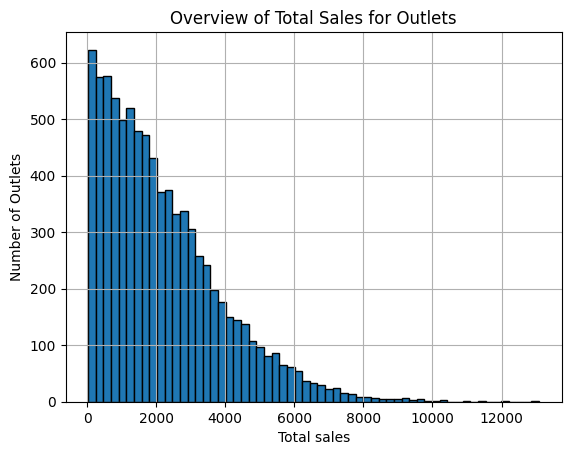

In [9]:
ax = df['Item_Outlet_Sales'].hist(bins ='auto', edgecolor = 'black')
ax.set_title('Overview of Total Sales for Outlets')
ax.set_xlabel('Total sales')
ax.set_ylabel('Number of Outlets');

- Histogram for total sales
- The data indicates that 600+ outlets made a sale
- 100 outlets made 5000 + sales

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

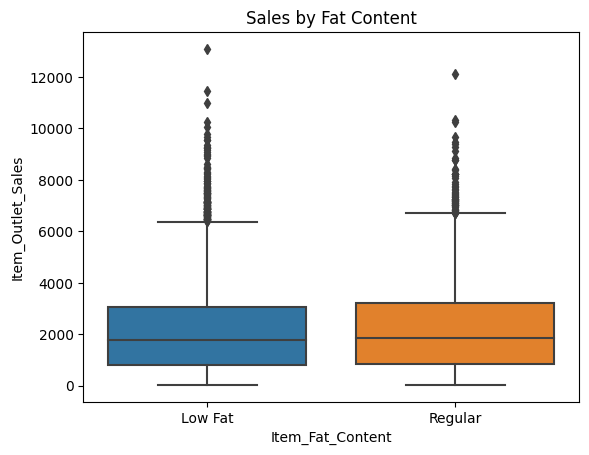

In [ ]:
#boxplot
ax= sns.boxplot ( x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)
ax.set_title('Sales by Fat Content');

#The data is symmetrical, tightly grouped, very few outlier values.

Text(0, 0.5, 'Outlet_Type')

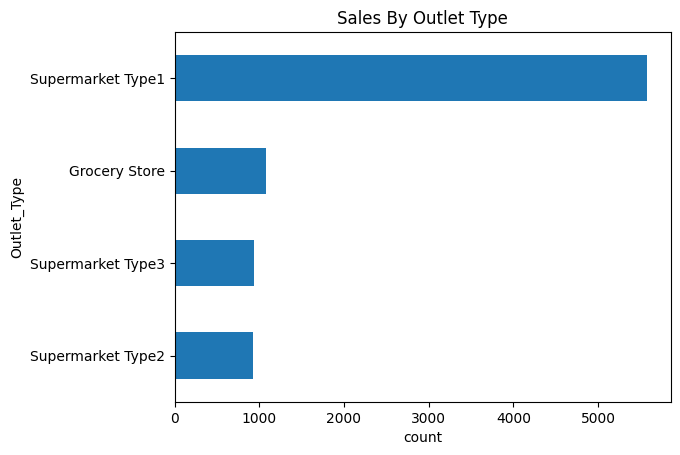

In [ ]:
#countplot
#total sales by outlet type

outlet_value_counts = df['Outlet_Type'].value_counts(dropna=False).sort_values()
ax = outlet_value_counts.plot(kind = 'barh')
ax.set_title('Sales By Outlet Type')
ax.set_xlabel('count')
ax.set_ylabel('Outlet_Type')

In [ ]:
#Heatmap
#Find correlations
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


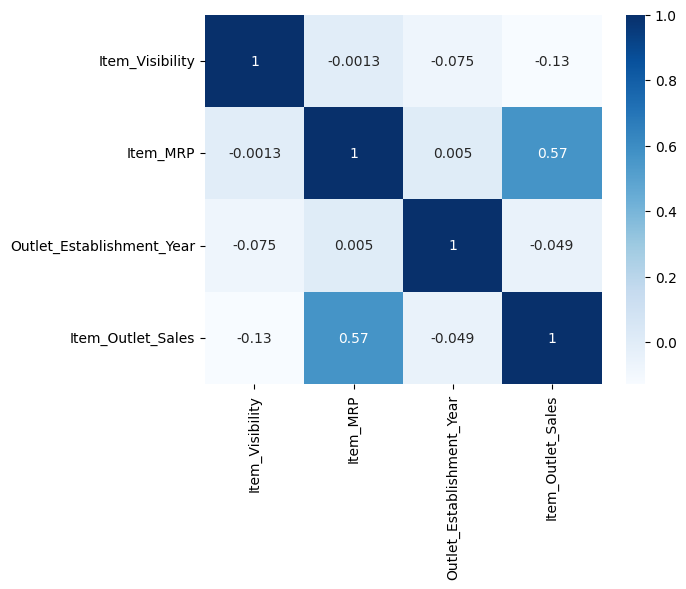

In [ ]:
sns.heatmap(corr,cmap = 'Blues', annot = True);
# positive correlation, realtionship between item_Outlet_Sales and item_MRP

Text(0.5, 1.0, 'Outlet sales vs Item Fat Content grouped by Outlet Type')

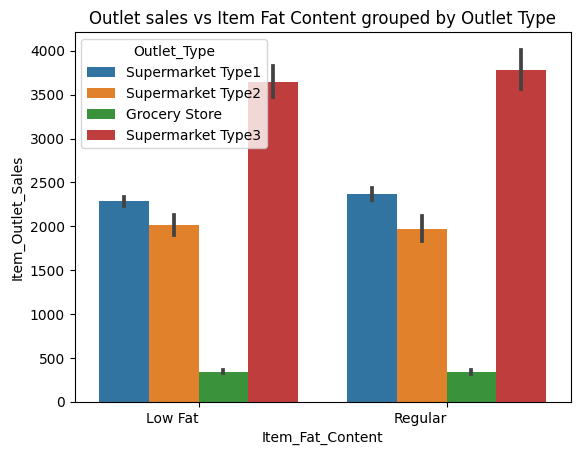

In [ ]:
#barplot of outlet sales and Fat content by outlet type

ax = sns.barplot(data=df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha='right');
ax.set_title('Outlet sales vs Item Fat Content grouped by Outlet Type')

Text(0.5, 1.0, 'Scatter plot Sales vs Outlet Location')

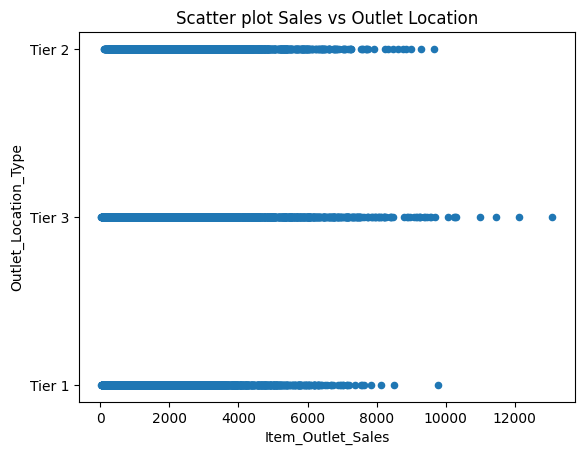

In [ ]:
#Scatter plot of Sales vs Outlet Location
ax = df.plot(kind = 'scatter', x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type');
ax.set_title ("Scatter plot Sales vs Outlet Location")

Text(0.5, 1.0, 'Scatter plot Sales vs Outlet Location grouped by Outlet Type')

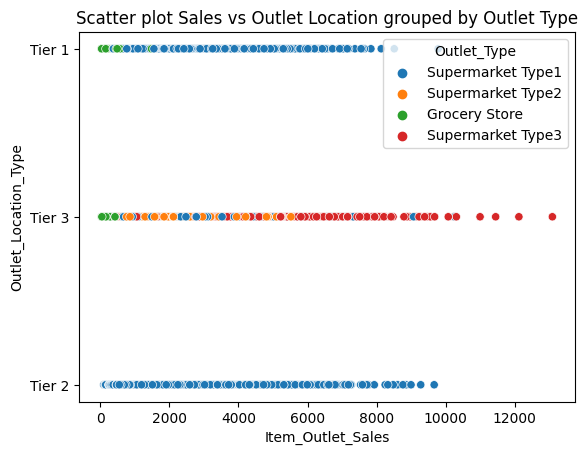

In [ ]:
#Scatter plot of Sales vs Outlet Location colored by outlet type
ax = sns.scatterplot(data=df, x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type', hue = 'Outlet_Type');
ax.set_title ("Scatter plot Sales vs Outlet Location grouped by Outlet Type")

## Explanatory Data Analysis

### EDA Functions

In [15]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [16]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Load the Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### LOAD DATASET FROM GOOGLE DRIVE
# load data
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Keep required columns
use_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Outlet_Sales']
df = df[use_cols]
df

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,Dairy,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,Soft Drinks,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,Meat,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,Fruits and Vegetables,NaN,Grocery Store,732.3800
4,8.930,Low Fat,Household,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...
8518,6.865,Low Fat,Snack Foods,High,Supermarket Type1,2778.3834
8519,8.380,Regular,Baking Goods,NaN,Supermarket Type1,549.2850
8520,10.600,Low Fat,Health and Hygiene,Small,Supermarket Type1,1193.1136
8521,7.210,Regular,Snack Foods,Medium,Supermarket Type2,1845.5976


In [ ]:
#convert to string
df['Item_Weight'] = df['Item_Weight'].astype(str)

#Replace 'missing' with 'Null'
df['Item_Weight'] = df['Item_Weight'].str.replace('MISSING','', regex ='False')

#convert string to float
df['Item_Weight'] = df['Item_Weight'].astype(float)
# Check the value counts again to confirm
df.value_counts('Item_Weight')

df['Outlet_Size'] = df['Outlet_Size'].str.replace('MISSING','', regex ='False')
df.value_counts('Outlet_Size')

Outlet_Size
Medium    2793
Small     2388
High       932
dtype: int64

In [ ]:
missing_values = df.isna().sum()
missing_values

Item_Weight          1463
Item_Fat_Content        0
Item_Type               0
Outlet_Size          2410
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

### Features Definition


> Prediction of product sales
>>* Item_Identifier	= Product ID
>>* Item_Identifier	= Product ID
>>* Item_Weight	= Weight of product
>>* Item_Fat_Content =	Whether the product is low-fat or regular
>>* Item_Visibility =	The percentage of total display area of all products in a store allocated to the particular product
>>* Item_Type =	The category to which the product belongs
>>* Item_MRP =	Maximum Retail Price (list price) of the product
>>* Outlet_Identifier =	Store ID
>>* Outlet_Establishment_Year =	The year in which store was established
>>* Outlet_Size =	The size of the store in terms of ground area covered
>>* Outlet_Location_Type =	The type of area in which the store is located
>>* Outlet_Type =	Whether the outlet is a grocery store or some sort of supermarket
>>* Item_Outlet_Sales =	Sales of the product in the particular store. This is the target variable to be predicted.


> The target column
>>*   Item_Outlet_Sales








Inspecting Each Feature

### Item Weight

In [12]:
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

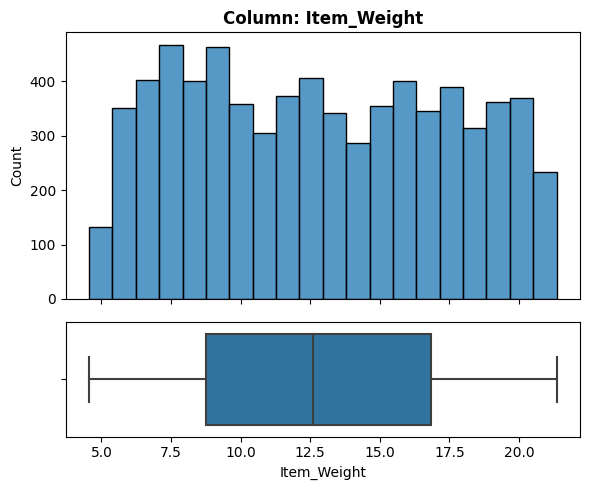

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No'
4. What is the cardinality? Is it high (>10)

  - Not applicable (numeric).

5. Would we know this before the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - The feature might be out of the owners control however it can assist with predicting sales.

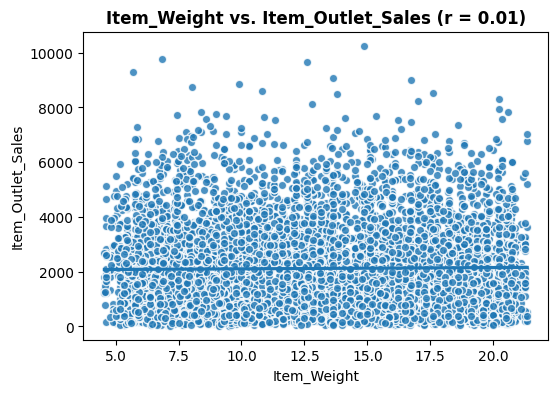

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes, if the products weight is more and in the similar price range of a smaller weight product of the same catogory, sales will increase.
  - Does this feature appear to be a predictor of the target?
    - No, there are constant sales no matter what the weight is.

### Item Fat Contents

In [13]:
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

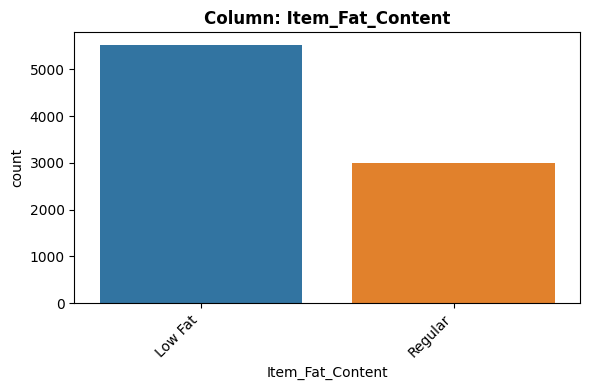

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [20]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high (>10)

  - 2 unique values (very low).

5. Would we know this before the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

In [5]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

NameError: ignored

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, we have outliers on Low Fat which will effect the target
  - Does this feature appear to be a predictor of the target?
    - Yes, regular has a slighly higher Outlet Sales

###Item Type

In [ ]:
feature = "Item_Type"
df[feature].dtype

dtype('O')

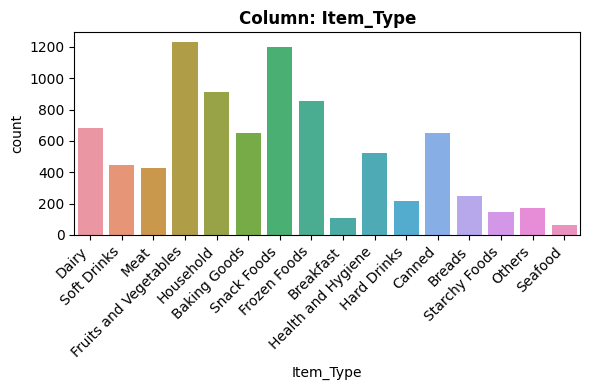

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high (>10)

  - 16 unique values (High).

5. Would we know this before the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

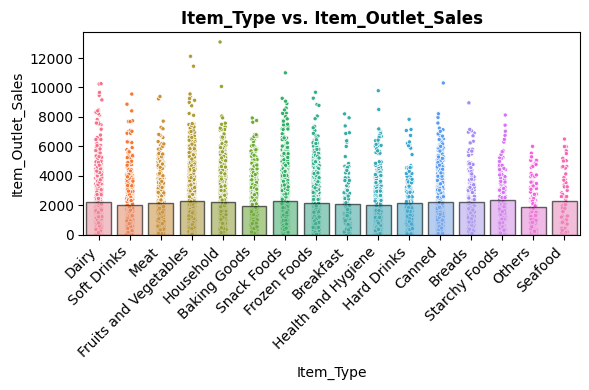

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, there are variability between the groups, even though some have similar means
    

###Outlet Size

In [ ]:
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

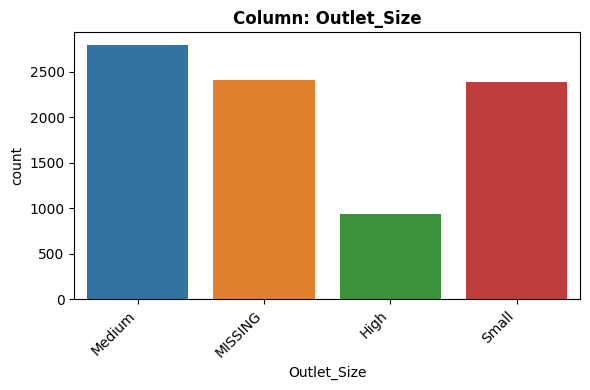

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%)
  - Im pute with "Missing" placeholder

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high (>10)

  - 4 unique values (Low).

5. Would we know this before the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

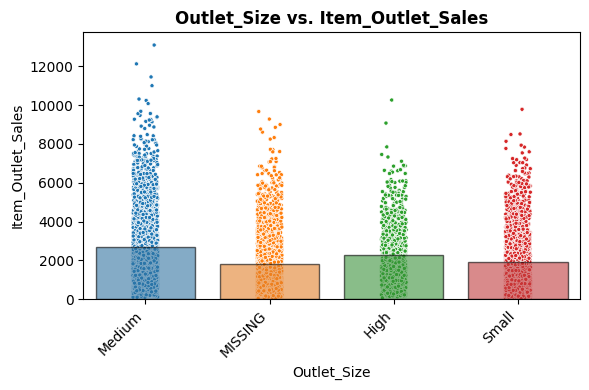

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, there are variability between the groups, even though some have similar means

###Outlet Type

In [ ]:
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

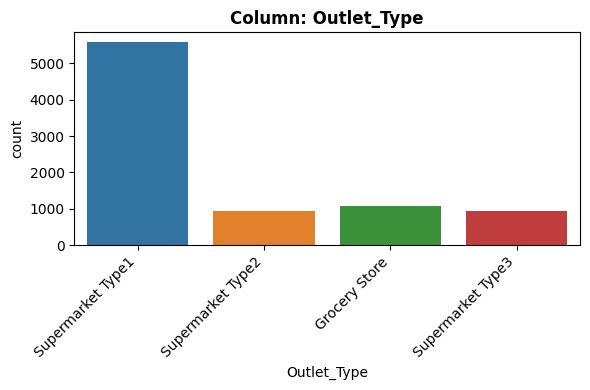

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -0 (0%)

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high (>10)

  - 4 unique values (Low).
  - Supermarket type 1 is the most common value.

5. Would we know this before the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No

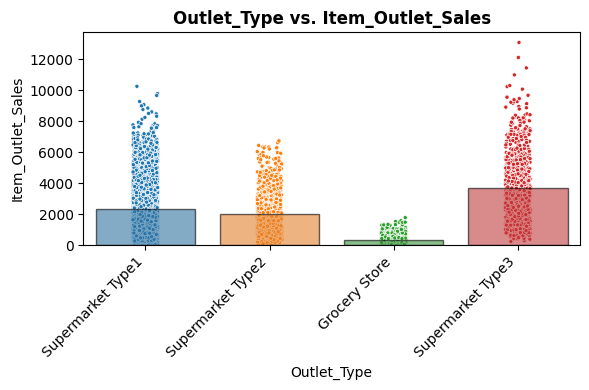

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes

### Item Outlet Sales (Target)

In [ ]:
feature = "Item_Outlet_Sales"
df[feature].dtype


dtype('float64')

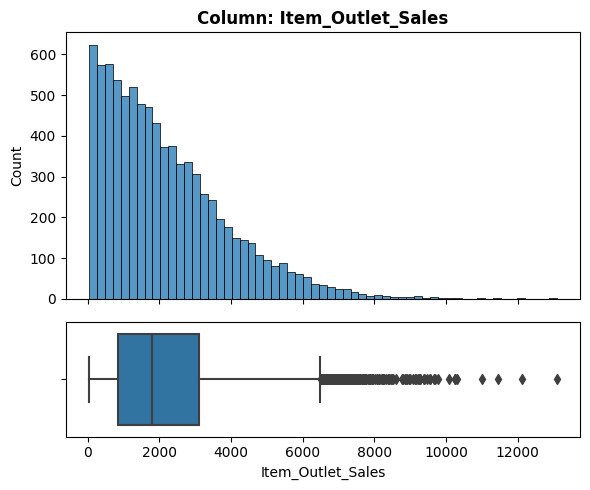

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0%)

3. Is the feature constant or quasi-constant?
  - Not a feature

4. What is the cardinality? Is it high (>10)

  - Not applicable (numeric).

5. Would we know this before the target is determined?
  - Yes, since it is our target

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its out target

### Train Test

In [22]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df1 = pd.read_csv(fpath)
# use a fresh copy of data, new dataframe df1 created.

In [ ]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Check for duplicate rows
duplicated_rows = df1.duplicated()
df1.duplicated().sum()

0

In [ ]:
# check missing values
missing_values = df1.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Obtain the value counts for all string columns to check for consistency in the data
string_cols = df1.select_dtypes('object').columns
for col in string_cols:
  print(f'Value Counts for {col}')
  print(df1[col].value_counts())
# Increase visibility when reading the data
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# Check for outliers ( unsual data)
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
# Replace "LF" with "Low Fat"
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].str.replace('LF','Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].str.replace('low fat','Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].str.replace('reg','Regular')
# Check the value counts again to confirm
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Define features (x) and (y)
X = df1.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Establishment_Year','Outlet_Identifier'])
y = df1['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,NaN,Tier 2,Supermarket Type1


In [ ]:
# Check for null values
X_train.isna().sum()

Item_Weight             1107
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             1812
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
X_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
dtype: object

In [ ]:
X_train.shape

(6392, 8)

In [ ]:
X_test.shape

(2131, 8)

- Which X variable has more columns?
  - they have the same number of columns (11)
- Which X variable has more rows?
  - X_train

In [ ]:
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [ ]:
ordinal_cols = ['Outlet_Size','Outlet_Location_Type']
ordinal_cols

['Outlet_Size', 'Outlet_Location_Type']

In [ ]:
categorical_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
categorical_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object')

### Impute the numeric columns

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'))

### Impute the categorical columns

In [ ]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
categorical_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", categorical_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe


OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, categorical_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [ ]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Transform the training data
X_train_processed = preprocessor.transform(X_train)
# Transform the testing data
X_test_processed = preprocessor.transform(X_test)
# View the processed training data
X_train_processed.head(5)


,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [ ]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
# View the intercept determined during the fit step
lin_reg.intercept_.round(2)

4098651204084270.5

In [ ]:
# View the coefficents determined during the fit step
lin_reg.coef_.round(4)

array([-7.14170000e+00, -2.14366000e+01,  9.84184300e+02,  1.16110637e+13,
        1.16110637e+13, -4.15046728e+14, -4.15046728e+14, -4.15046728e+14,
       -4.15046728e+14, -4.15046728e+14, -4.15046728e+14, -4.15046728e+14,
       -4.15046728e+14, -4.15046728e+14, -4.15046728e+14, -4.15046728e+14,
       -4.15046728e+14, -4.15046728e+14, -4.15046728e+14, -4.15046728e+14,
       -4.15046728e+14, -5.92973941e+13, -5.92973941e+13, -5.92973941e+13,
       -5.92973941e+13, -8.45318561e+13, -8.45318561e+13, -8.45318561e+13,
       -3.55138629e+15, -3.55138629e+15, -3.55138629e+15, -3.55138629e+15])

In [ ]:
# Get a list of the feature names after processing
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_NA',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [ ]:
# Create a Pandas Series with feature name and coefficient
coeffs = pd.Series(lin_reg.coef_.round(2), index = feature_names)
coeffs

Item_Weight                       -7.140000e+00
Item_Visibility                   -2.144000e+01
Item_MRP                           9.841800e+02
Item_Fat_Content_Low Fat           1.161106e+13
Item_Fat_Content_Regular           1.161106e+13
Item_Type_Baking Goods            -4.150467e+14
Item_Type_Breads                  -4.150467e+14
Item_Type_Breakfast               -4.150467e+14
Item_Type_Canned                  -4.150467e+14
Item_Type_Dairy                   -4.150467e+14
Item_Type_Frozen Foods            -4.150467e+14
Item_Type_Fruits and Vegetables   -4.150467e+14
Item_Type_Hard Drinks             -4.150467e+14
Item_Type_Health and Hygiene      -4.150467e+14
Item_Type_Household               -4.150467e+14
Item_Type_Meat                    -4.150467e+14
Item_Type_Others                  -4.150467e+14
Item_Type_Seafood                 -4.150467e+14
Item_Type_Snack Foods             -4.150467e+14
Item_Type_Soft Drinks             -4.150467e+14
Item_Type_Starchy Foods           -4.150

In [ ]:
X_train_processed.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Get predictions for the training data
y_predictions_train = lin_reg.predict(X_train_processed)
# Get predictions for the testing data
y_predictions_test = lin_reg.predict(X_test_processed)
y_predictions_test


array([1361.5,  717. ,  883. , ..., 3371. , 2027. , 2391.5])

In [ ]:
# Saving a copy of X_test_processed and adding the true and predicted price and the error
prediction_df1 = X_test_processed.copy()
prediction_df1['Item_Outlet_Sales'] = y_test
prediction_df1['Predicted Item_Outlet_Sales'] = y_predictions_test.round(1)
prediction_df1['Error'] = (y_predictions_test - y_test).round(1)
prediction_df1.head(10)


,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales,Predicted Item_Outlet_Sales,Error
7503,0.341372,-0.776646,-0.998816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1743.0644,1361.5,-381.6
2957,-1.169135,0.100317,-1.585194,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,356.8688,717.0,360.1
7031,0.388798,-0.482994,-1.595784,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,377.5086,883.0,505.5
1084,-0.049889,-0.415440,0.506592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5778.4782,4238.0,-1540.5
856,-0.632039,-1.047426,0.886725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2356.9320,3344.0,987.1
4304,-0.796844,-0.470511,-1.748367,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,865.5400,611.5,-254.0
2132,-0.049889,1.189692,1.070615,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4613.9940,4760.0,146.0
1385,-0.559715,-1.025995,0.000559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2410.8618,2064.5,-346.4
5239,0.270234,-0.824923,-0.620321,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1948.1308,1403.0,-545.1
6516,-1.031601,-0.974654,0.801084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1937.4780,2818.5,881.0


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_predictions_test, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_predictions_test)
  mse = mean_squared_error(y_true, y_predictions_test)
  rmse = mean_squared_error(y_true, y_predictions_test, squared=False)
  r_squared = r2_score(y_true, y_predictions_test)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics



In [ ]:
# Test function using test data and default for output_dict
regression_metrics(y_test, y_predictions_test, label = 'Test Data')


------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.621
- MSE = 1,197,329.226
- RMSE = 1,094.225
- R^2 = 0.566


In [ ]:
# Test function on training data and save the dictionary as a variable
training_metrics = regression_metrics(y_train, y_predictions_train, label = 'Training Data')



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,298,650.878
- RMSE = 1,139.584
- R^2 = 0.561


###Custom Function

In [ ]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_prections_train = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_predictions_train, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  y_predictions_test = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_predictions_test, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [ ]:
 # Test function with default arguments
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,298,650.878
- RMSE = 1,139.584
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 805.621
- MSE = 1,197,329.226
- RMSE = 1,094.225
- R^2 = 0.566


In [ ]:
# Test function by saving results as a dataframe and suppressing print statements with verbose = False
results = evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test, verbose = False, output_frame = True)

In [ ]:
results

,MAE,MSE,RMSE,R^2
Training Data,847.109,1298650.878,1139.584,0.561
Test Data,805.621,1197329.226,1094.225,0.566


### Evaluation
This model indicates a low bias and a low variance. The model indicates a slight underfit due to the training errors being slightly more however the model is well balanced.


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor # NEW

In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,298,650.878
- RMSE = 1,139.584
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 774.103
- MSE = 1,252,845.362
- RMSE = 1,119.306
- R^2 = 0.546


Compare the training vs test R-Squared values: to what extent is this model overfit/underfit?
- Balanced ( Good Fit)

Compare this models performance to the linear regression model: which model has the best test scores?
- The Random Forest model as the training data R2 value is higher than the test data.

### GridSearchCV

In [ ]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                   

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_va...
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 3,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__oob_score': True}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.109
- MSE = 1,298,650.878
- RMSE = 1,139.584
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 736.057
- MSE = 1,121,801.305
- RMSE = 1,059.151
- R^2 = 0.593


Compare your tuned model to your default Random Forest: Did the perfromance improve? Yes, R^2 before: 0.546, R^2 after: 0.593

### Evaluation

* Overall, which model do you recommend? Random Forest Model
* Justify your recommendation.
  - The Random Forest model showed a higher R^2 value when using GridSearchCV to tune the hyperparameters.
  
  - Random Forest are reliable and effective.
  - Random Forest fit data better from the get go without the transforms.
  - You dont need to scale the data and often dont need to remove outliers.

 In a Markdown cell:
* Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.
  - In simple terms, r-squared is how well the regression model explains the input data. The higher the r-squared % would mean the more the variability observed in the target variable is explained by the model.
  - The R-Squared results in the model indicates that 59% of the variation in the outcome is explained by the model, the remaining 41% is due to other factors or random error.

* Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.
  - MAE- (Mean Absolute Error), is the average absolute error between actual and predicted values.
  - The value is on the same the same scale as the target.
  - Simply, MAE can be interpreted as the average error that the models prediction have in comparison with their corresponding targets.
  - In this model our target is the Item Outlet Sales, the average error between the prediction and actuals in this dataset is 774.10

* Include why you selected this metric to explain to your stakeholder.
Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?
 - This model has a slight underfit, from comparing the training to the test scores we can notice that the MAE,MSE and RMSE is ACTUALLY HIGHER on the training and the R^2 value is lower as compared the testing model.
 - This could be due to insufficient data